In [1]:
import numpy as np
from math import *
import pylab as py

In [2]:
d_air=1.27# kg m^(-3)
c=0.47
v=190.# m s^(-1)
r=0.14# m
theta=43*np.pi/180# radians
x0=0.
y0=4.# m
vx0=v*np.cos(theta)
vy0=v*np.sin(theta)
g=9.8 # m s^(-2)

d_Pb=11.3*1000# kg m^(-3)
d_Pu=19.7*1000
d_Nd=7.0*1000

m_Pb=(4/3)*np.pi*(r**3)*d_Pb
m_Pu=(4/3)*np.pi*(r**3)*d_Pu
m_Nd=(4/3)*np.pi*(r**3)*d_Nd

In [3]:
# f1_x=dx/dt, f1_y=dy/dt, f2_x=df1_x/dt, f2_y=df1_y/dt
def f_Pb(r_Pb,t):
    Pb_x=r_Pb[0]
    Pb_y=r_Pb[1]
    Pb_1_x=r_Pb[2]
    Pb_1_y=r_Pb[3]
    Pb_f1_x=Pb_1_x
    Pb_f1_y=Pb_1_y
    Pb_f2_x=(-1)*np.pi*(r**2)*(d_air)*c*(1/(2*m_Pb))*Pb_f1_x*v
    Pb_f2_y=((-1)*g)-(np.pi*(r**2)*d_air*c*(1/(2*m_Pb))*Pb_f1_y*v)
    return np.array([Pb_f1_x,Pb_f1_y,Pb_f2_x,Pb_f2_y],float)

In [4]:
def f_Pu(r_Pu,t):
    Pu_x=r_Pu[0]
    Pu_y=r_Pu[1]
    Pu_1_x=r_Pu[2]
    Pu_1_y=r_Pu[3]
    Pu_f1_x=Pu_1_x
    Pu_f1_y=Pu_1_y
    Pu_f2_x=(-1)*np.pi*(r**2)*(d_air)*c*(1/(2*m_Pu))*Pu_f1_x*v
    Pu_f2_y=((-1)*g)-(np.pi*(r**2)*d_air*c*(1/(2*m_Pu))*Pu_f1_y*v)
    return np.array([Pu_f1_x,Pu_f1_y,Pu_f2_x,Pu_f2_y],float)

In [5]:
def f_Nd(r_Nd,t):
    Nd_x=r_Nd[0]
    Nd_y=r_Nd[1]
    Nd_1_x=r_Nd[2]
    Nd_1_y=r_Nd[3]
    Nd_f1_x=Nd_1_x
    Nd_f1_y=Nd_1_y
    Nd_f2_x=(-1)*np.pi*(r**2)*(d_air)*c*(1/(2*m_Nd))*Nd_f1_x*v
    Nd_f2_y=((-1)*g)-(np.pi*(r**2)*d_air*c*(1/(2*m_Nd))*Nd_f1_y*v)
    return np.array([Nd_f1_x,Nd_f1_y,Nd_f2_x,Nd_f2_y],float)

In [6]:
a=0.0
b=500.0
N=500000
h=(b-a)/N

In [7]:
tpoints=np.arange(a,b,h)
Pb_xpoints=[]
Pb_ypoints=[]
Pu_xpoints=[]
Pu_ypoints=[]
Nd_xpoints=[]
Nd_ypoints=[]

In [8]:
r_Pb=np.array([x0,y0,vx0,vy0],float)
r_Pu=np.array([x0,y0,vx0,vy0],float)
r_Nd=np.array([x0,y0,vx0,vy0],float)

In [9]:
for t in tpoints:
    Pb_xpoints.append(r_Pb[0])
    Pb_ypoints.append(r_Pb[1])
    k1_Pb=h*f_Pb(r_Pb,t)
    k2_Pb=h*f_Pb(r_Pb+0.5*k1_Pb,t+0.5*h)
    k3_Pb=h*f_Pb(r_Pb+0.5*k2_Pb,t+0.5*h)
    k4_Pb=h*f_Pb(r_Pb+k3_Pb,t+h)
    r_Pb += (k1_Pb+2*k2_Pb+2*k3_Pb+k4_Pb)/6
    if r_Pb[1] < 0:
        break
    else:
        continue

for t in tpoints:
    Pu_xpoints.append(r_Pu[0])
    Pu_ypoints.append(r_Pu[1])
    k1_Pu=h*f_Pu(r_Pu,t)
    k2_Pu=h*f_Pu(r_Pu+0.5*k1_Pu,t+0.5*h)
    k3_Pu=h*f_Pu(r_Pu+0.5*k2_Pu,t+0.5*h)
    k4_Pu=h*f_Pu(r_Pu+k3_Pu,t+h)
    r_Pu += (k1_Pu+2*k2_Pu+2*k3_Pu+k4_Pu)/6
    if r_Pu[1] < 0:
        break
    else:
        continue
    
for t in tpoints:
    Nd_xpoints.append(r_Nd[0])
    Nd_ypoints.append(r_Nd[1])
    k1_Nd=h*f_Nd(r_Nd,t)
    k2_Nd=h*f_Nd(r_Nd+0.5*k1_Nd,t+0.5*h)
    k3_Nd=h*f_Nd(r_Nd+0.5*k2_Nd,t+0.5*h)
    k4_Nd=h*f_Nd(r_Nd+k3_Nd,t+h)
    r_Nd += (k1_Nd+2*k2_Nd+2*k3_Nd+k4_Nd)/6
    if r_Nd[1] < 0:
        break
    else:
        continue
    

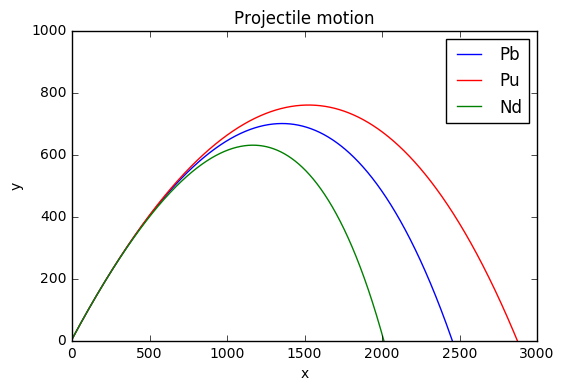

In [10]:
py.plot(Pb_xpoints,Pb_ypoints,label='Pb',color='blue')
py.plot(Pu_xpoints,Pu_ypoints,label='Pu',color='red')
py.plot(Nd_xpoints,Nd_ypoints,label='Nd',color='green')
py.ylim(0,1000)
py.xlim(0,3000)
py.legend()
py.title("Projectile motion")
py.xlabel("x")
py.ylabel("y")
py.show()



In [11]:
print(Pb_ypoints[-1],Pb_xpoints[-1])
print(Pu_ypoints[-1],Pu_xpoints[-1])
print(Nd_ypoints[-1],Nd_xpoints[-1])
# distance_Pb = Pb_xpoints[-1]
# distance_Pu = Pu_xpoints[-1]
# distance_Nd = Nd_xpoints[-1]

0.0636036914146 2453.14120612
0.0410172565633 2872.74115809
0.0892661919823 2011.55763693
